# Suboptimility vs. $\epsilon$

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

Definition of suboptimality function:

$$ Sub(\epsilon) = W_{2, \epsilon}^2(\rho, \mu) - W_{2}^2(\rho, \mu) = 8 \int_0^\infty \frac{x}{1 + e^{4x/\epsilon}} \rho(x) dx.$$

In [2]:
def suboptimality(eps, rho, M):
    f = lambda x: 8 * x/(1 + np.exp(4*x/eps)) * rho(x)
    return quad(f, 0, M, epsabs=1e-10, epsrel=1e-10)[0]

Definition of asymptotic:
$$ Asymp(\epsilon) = \frac{\pi^2 \rho(0)}{24} \epsilon^2. $$

In [3]:
def asymp(eps, rho):
    return np.pi**2 * rho(0) *eps**2 / 24

## Rescaled Gaussian

Definition of source:
$$\rho(x) = \frac{1}{Z}e^{-x^2/\sigma^2} \mathbb{1}_{[-M, M]}(x). $$

Integral over [-M, M]: 1.0


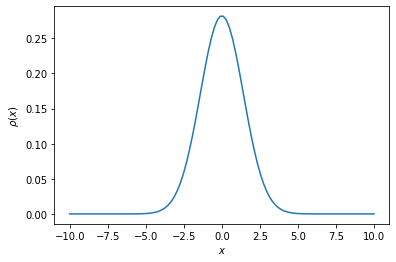

In [4]:
sigma = 2
M = 10

f = lambda u: np.exp(-u**2/sigma**2)
int_f = quad(f, -M, M, epsabs=1e-10, epsrel=1e-10)[0]

def rho(x):    
    return f(x)/int_f

print(r"Integral over [-M, M]:", quad(rho, -M, M)[0])

xx = np.linspace(-M, M, 100)
plt.plot(xx, rho(xx))
plt.xlabel("$x$")
plt.ylabel(r"$\rho(x)$")
plt.savefig('density-gaussian.pdf')  
plt.show()

Plot of suboptimality vs. asymptotic functions:

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


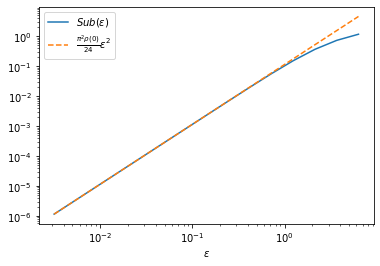

In [5]:
epsilons = np.logspace(-2.5, 0.8, 15)

suboptimalities = np.array([suboptimality(eps, rho, M) for eps in epsilons])
asymps = np.array([asymp(eps, rho) for eps in epsilons])

plt.loglog(epsilons, suboptimalities, label=r"$Sub(\epsilon)$")
plt.loglog(epsilons, asymps, "--", label=r"$\frac{\pi^2 \rho(0)}{24}\epsilon^2$")
plt.xlabel(r"$\epsilon$")
plt.legend()
plt.savefig('asymptotics-gaussian.pdf')  
plt.show()

Plot of (asymptotic - suboptimality):

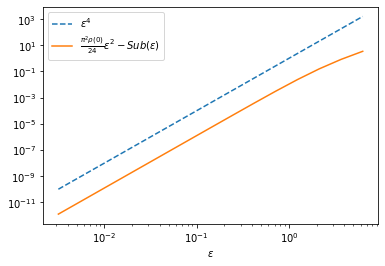

In [6]:
comparison = np.array([eps**4 for eps in epsilons])
plt.loglog(epsilons, comparison, "--", label=r"$\epsilon^4$")

plt.loglog(epsilons, asymps - suboptimalities, label=r"$\frac{\pi^2 \rho(0)}{24}\epsilon^2 - Sub(\epsilon)$")
plt.xlabel(r"$\epsilon$")
plt.legend()
plt.savefig('cv-rate-to-asymptotic-gaussian.pdf')  
plt.show()

## Rescaled Laplacian

Definition of source $\rho$:
$$\rho(x) = \frac{1}{Z}e^{-|x|} \mathbb{1}_{[-M, M]}(x) $$

Integral over [-M, M]: 1.0


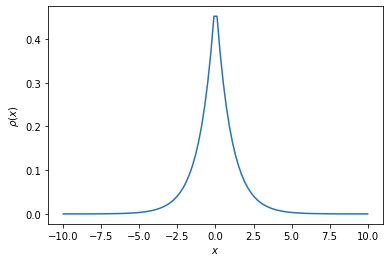

In [7]:
M = 10

f = lambda u: np.exp(-np.abs(u))
int_f = quad(f, -M, M, epsabs=1e-10, epsrel=1e-10)[0]

def rho(x):    
    return f(x)/int_f

print(r"Integral over [-M, M]:", quad(rho, -M, M)[0])

xx = np.linspace(-M, M, 100)
plt.plot(xx, rho(xx))
plt.xlabel("$x$")
plt.ylabel(r"$\rho(x)$")
plt.savefig('density-laplace.pdf')  
plt.show()

Plot of suboptimality vs. asymptotic functions:

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


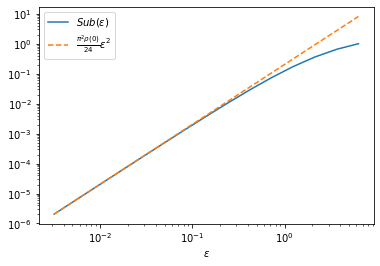

In [8]:
epsilons = np.logspace(-2.5, 0.8, 15)

suboptimalities = np.array([suboptimality(eps, rho, M) for eps in epsilons])
asymps = np.array([asymp(eps, rho) for eps in epsilons])

plt.loglog(epsilons, suboptimalities, label=r"$Sub(\epsilon)$")
plt.loglog(epsilons, asymps, "--", label=r"$\frac{\pi^2 \rho(0)}{24}\epsilon^2$")
plt.xlabel(r"$\epsilon$")
plt.legend()
plt.savefig('asymptotics-laplace.pdf')  
plt.show()

Plot of (asymptotic - suboptimality):

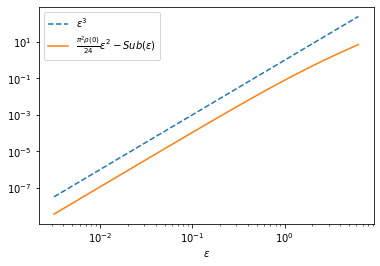

In [9]:
comparison = np.array([eps**3 for eps in epsilons])
plt.loglog(epsilons, comparison, "--", label=r"$\epsilon^3$")

plt.loglog(epsilons, asymps - suboptimalities, label=r"$\frac{\pi^2 \rho(0)}{24}\epsilon^2 - Sub(\epsilon)$")
plt.xlabel(r"$\epsilon$")
plt.legend()
plt.savefig('cv-rate-to-asymptotic-laplace.pdf')  
plt.show()